In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.batches as batches

from lsst.sims.maf.plots import PlotHandler
import healpy as hp

In [2]:
colmap = batches.ColMapDict('barebones')
colmap['ra'] = 'RA'
colmap['seeingEff'] = 'FWHMeff'
colmap['seeingGeom'] = 'FWHM_geometric'

In [3]:

outDir = 'lc_check'
resultsDb = db.ResultsDb(outDir=outDir)

conn_dict = {'Baseline': db.Database('feature_baseline_10yrs.db', defaultTable='observations'),
             'Third Mask': db.Database('feature_rolling_third_10yrs.db', defaultTable='observations'),
             'Half Mask': db.Database('feature_rolling_half_mask_10yrs.db', defaultTable='observations'),
             'Two Thirds Mask': db.Database('feature_rolling_twoThird_10yrs.db', defaultTable='observations')}

Querying database observations with constraint night < 3652 for columns ['RA', 'filter', 'dec', 'mjd', 'fivesigmadepth']
Found 2304177 visits
Running:  ['opsim_Pass_mjd_fivesigmadepth_filter_night_lt_3652_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
number of observations Baseline  1025
Querying database observations with constraint night < 3652 for columns ['RA', 'filter', 'dec', 'mjd', 'fivesigmadepth']
Found 2279495 visits
Running:  ['opsim_Pass_mjd_fivesigmadepth_filter_night_lt_3652_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
number of observations Third Mask  1091
Querying database observations with constraint night < 3652 for columns ['RA', 'filter', 'dec', 'mjd', 'fivesigmadepth']
Found 2284523 visits
Running:  ['opsim_Pass_mjd_fivesigmadepth_filter_night_lt_3652_USER']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
number of 

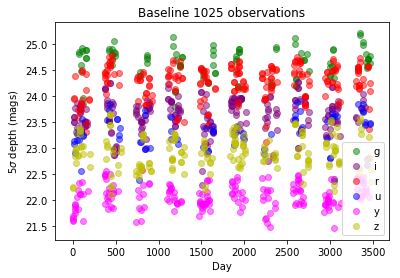

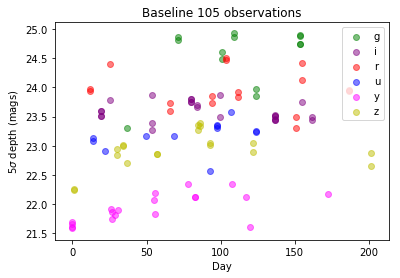

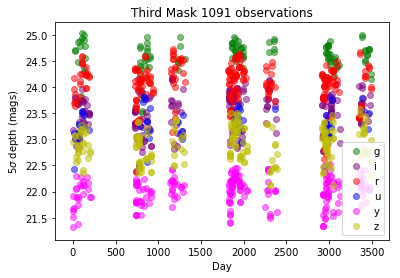

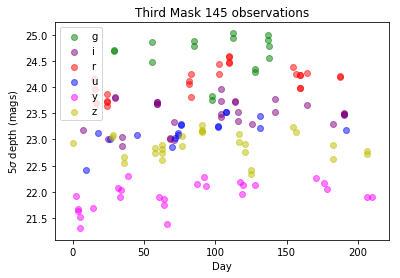

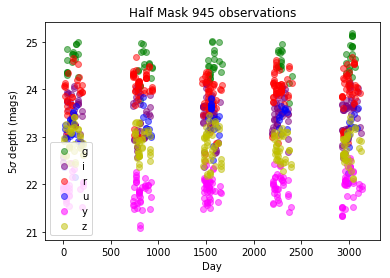

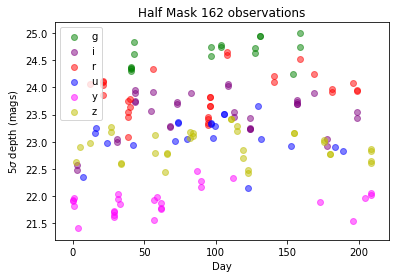

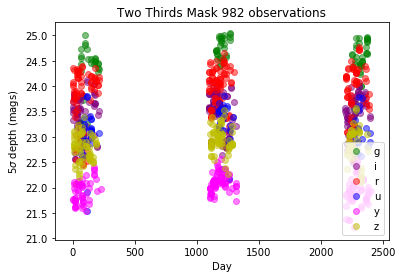

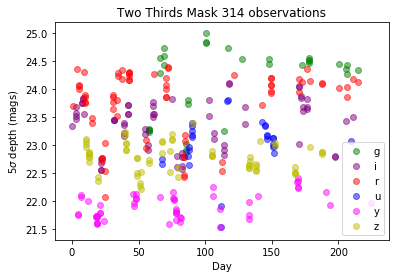

In [16]:
for runName in conn_dict:
    conn = conn_dict[runName]
    ra = [200.]
    dec = [-40.]

    slicer = slicers.UserPointsSlicer(ra=ra, dec=dec, latCol=colmap['dec'], lonCol=colmap['ra'])
    metric = metrics.PassMetric(cols=['mjd', 'fivesigmadepth', 'filter'])
    sql = 'night < %i' %(365.25*10)

    bundleList = []
    bundleList.append(metricBundles.MetricBundle(metric, slicer, sql))
    
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
    bg.runAll()
    
    print('number of observations '+runName+' ', bundleList[0].metricValues[0].size)
    
          
    filters = np.unique(bundleList[0].metricValues[0]['filter'])
    colors = {'u':'b','g':'g','r':'r','i':'purple',"z":'y',"y":'magenta'}
    
    mv = bundleList[0].metricValues[0]
    plt.figure()
    for filterName in filters:
        good = np.where(mv['filter'] == filterName)
        plt.scatter(mv['mjd'][good]-mv['mjd'].min(), mv['fivesigmadepth'][good], 
                    c=colors[filterName], label=filterName, alpha=.5)
    plt.xlabel('Day')
    plt.ylabel('5$\sigma$ depth (mags)')
    plt.legend(scatterpoints=1)
    plt.title(runName+' %i observations' % bundleList[0].metricValues[0].size)
    plt.savefig('Plots/%s_lc.pdf' % runName.replace(' ', '_'))
    
    plt.figure()
    for filterName in filters:
        good = np.where((mv['filter'] == filterName) & (mv['mjd']-mv['mjd'].min() < 360))
        plt.scatter(mv['mjd'][good]-mv['mjd'].min(), mv['fivesigmadepth'][good], 
                    c=colors[filterName], label=filterName, alpha=.5)
    plt.xlabel('Day')
    plt.ylabel('5$\sigma$ depth (mags)')
    plt.legend(scatterpoints=1)
    npts = np.where (mv['mjd']-mv['mjd'].min() < 360)
    plt.title(runName+' %i observations' % npts[0].size)
    plt.savefig('Plots/%s_lc_yr1.pdf' % runName.replace(' ', '_'))

In [15]:
456/2.

228.0

In [6]:
556./3.

185.33333333333334

In [7]:
483./4.

120.75

In [8]:
608./6.

101.33333333333333